In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the Titanic dataset

In [74]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Titanic-Dataset.csv')
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Check for missing values

In [75]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fixing the Missing Values:
 Age with "Median",
 cabin with "unknown",
 Embarked with "S" which is most common.

In [82]:
if df['Age'].isnull().sum() > 0:
  df['Age'].fillna(df['Age'].median(), inplace = True)

if df['Cabin'].isnull().sum() > 0:
  df['Cabin'].fillna('Unknown',inplace = True)

if df['Embarked'].isnull().sum() > 0:
  df['Embarked'].fillna('S', inplace = True)

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeGroup       0
FamilySize     0
dtype: int64


EDA(Exploratory Data Analysis)

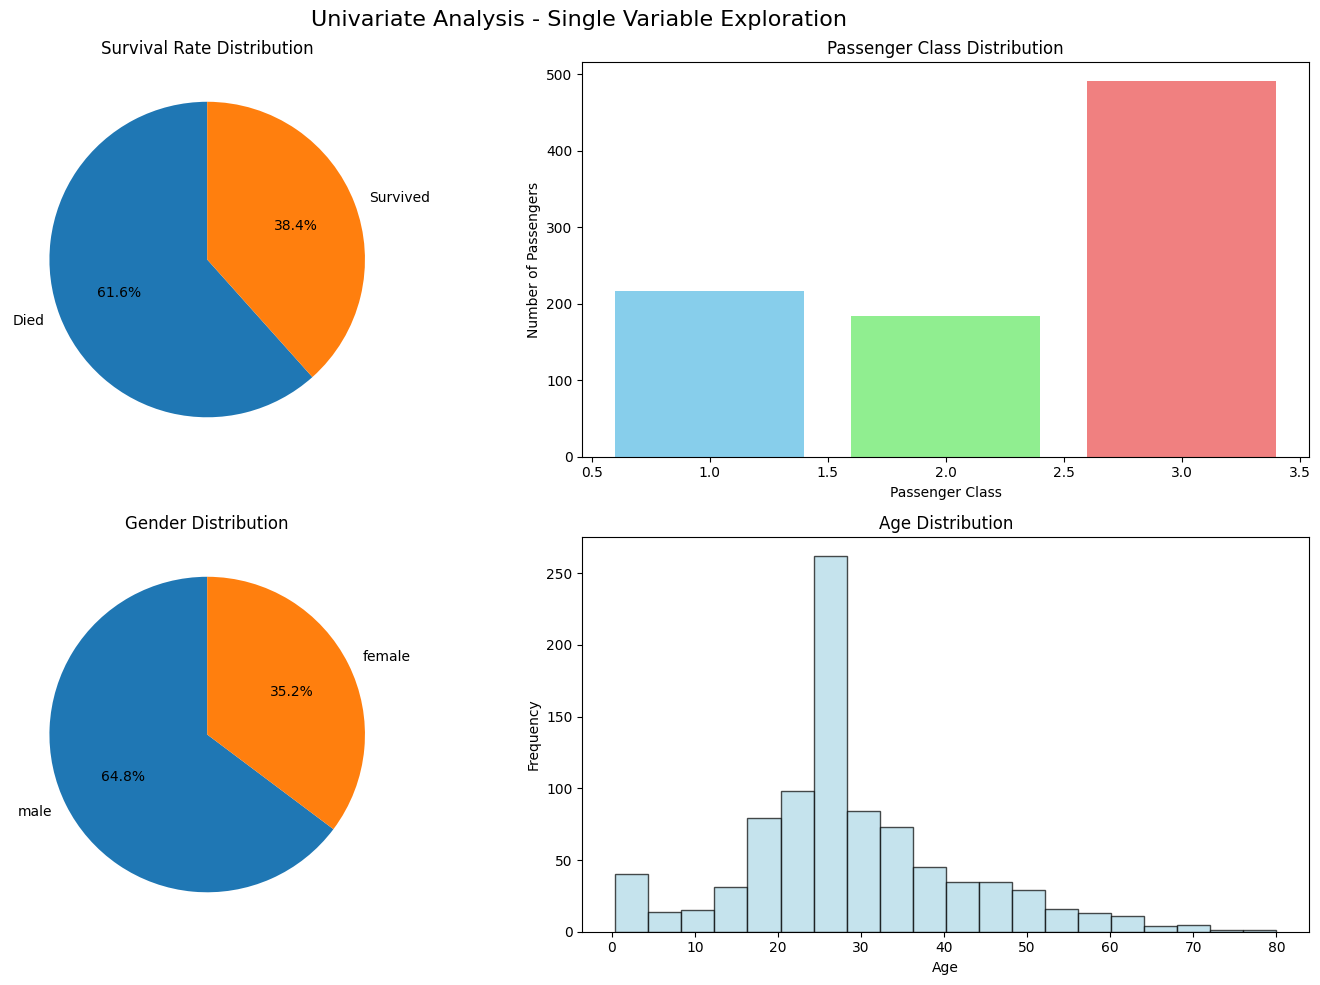


Key Statistics:
Total Passengers: 891
Survival Rate: 38.38%
Average Age: 29.4 years
Age Range: 0 - 80 years


In [77]:
# figure with multiple subplots for better organization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis - Single Variable Exploration', fontsize=16)

# 1. Survival Rate
survival_counts = df['Survived'].value_counts()
axes[0, 0].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Survival Rate Distribution')

# 2. Passenger Class Distribution
pclass_counts = df['Pclass'].value_counts().sort_index()
axes[0, 1].bar(pclass_counts.index, pclass_counts.values, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Passenger Class Distribution')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Number of Passengers')

# 3. Gender Distribution
gender_counts = df['Sex'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution')

# 4. Age Distribution
axes[1, 1].hist(df['Age'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Age Distribution')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# some basic statistics
print("\nKey Statistics:")
print(f"Total Passengers: {len(df)}")
print(f"Survival Rate: {df['Survived'].mean():.2%}")
print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")



BIVARIATE ANALYSIS


<ipython-input-78-7c2f65e9d662>:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(age_by_survival, labels=survival_labels)
<ipython-input-78-7c2f65e9d662>:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(fare_by_survival, labels=survival_labels)


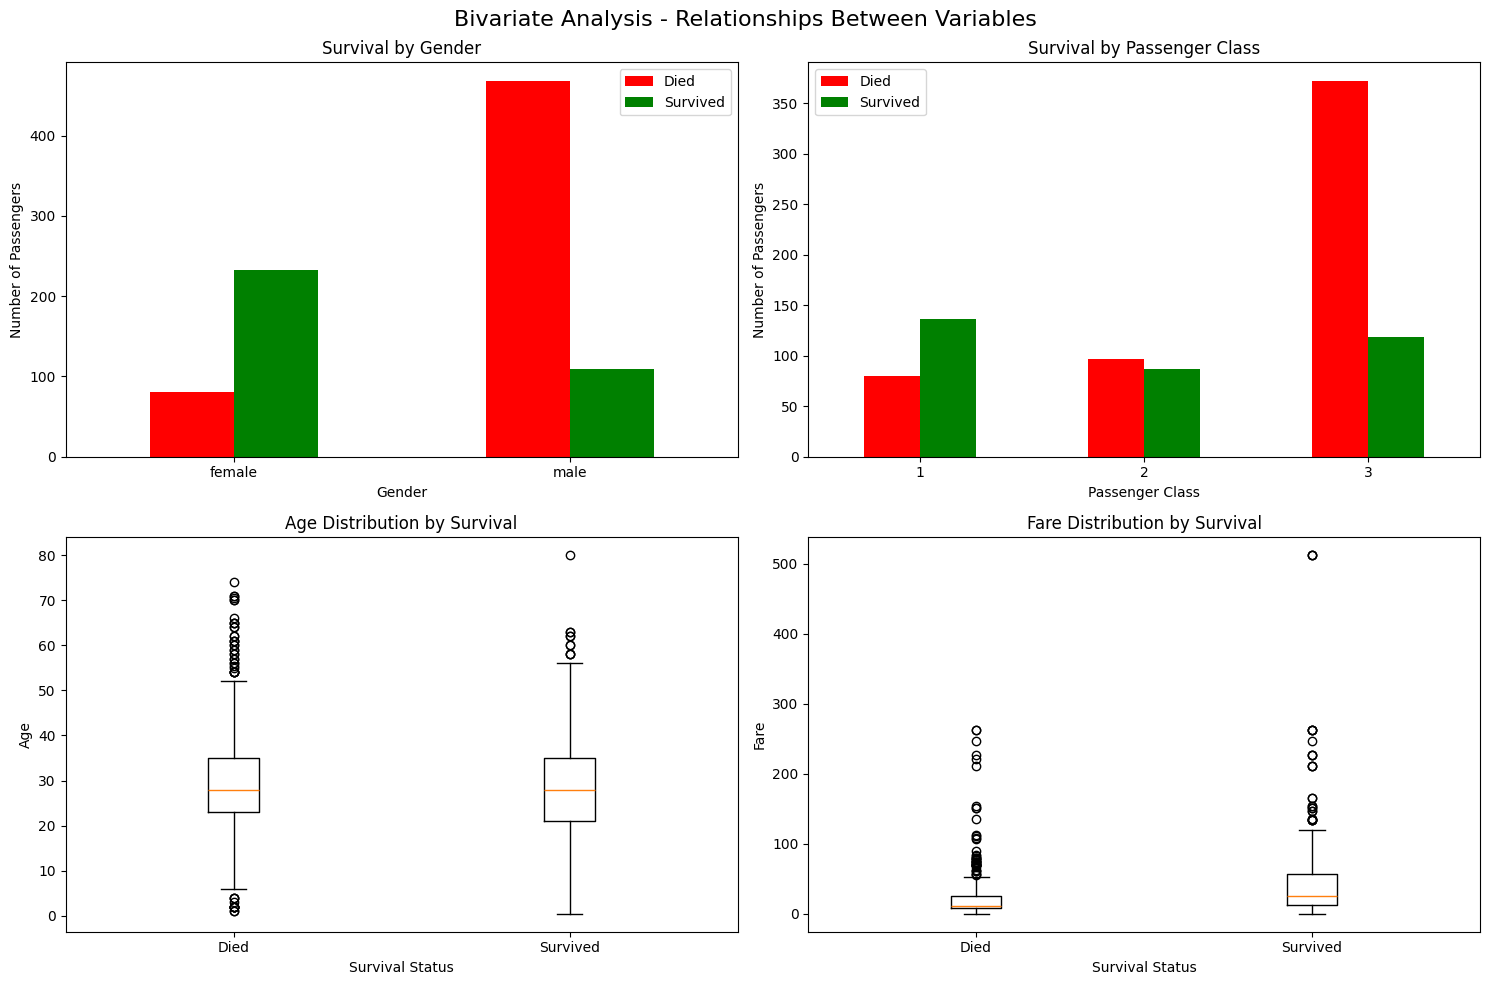


Survival Rates by Category:
Overall Survival Rate: 38.38%

By Gender:
Sex
female    74.20%
male      18.89%
Name: Survived, dtype: object

By Passenger Class:
Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object


In [78]:
print("\n" + "="*50)
print("BIVARIATE ANALYSIS")
print("="*50)


# Create figure for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bivariate Analysis - Relationships Between Variables', fontsize=16)

# 1. Survival by Gender
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', ax=axes[0, 0], color=['red', 'green'])
axes[0, 0].set_title('Survival by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Number of Passengers')
axes[0, 0].legend(['Died', 'Survived'])
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Survival by Passenger Class
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', ax=axes[0, 1], color=['red', 'green'])
axes[0, 1].set_title('Survival by Passenger Class')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Number of Passengers')
axes[0, 1].legend(['Died', 'Survived'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Age vs Survival (Box plot)
survival_labels = ['Died', 'Survived']
age_by_survival = [df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']]
axes[1, 0].boxplot(age_by_survival, labels=survival_labels)
axes[1, 0].set_title('Age Distribution by Survival')
axes[1, 0].set_xlabel('Survival Status')
axes[1, 0].set_ylabel('Age')

# 4. Fare vs Survival (Box plot)
fare_by_survival = [df[df['Survived'] == 0]['Fare'], df[df['Survived'] == 1]['Fare']]
axes[1, 1].boxplot(fare_by_survival, labels=survival_labels)
axes[1, 1].set_title('Fare Distribution by Survival')
axes[1, 1].set_xlabel('Survival Status')
axes[1, 1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

# survival rates by different categories
print("\nSurvival Rates by Category:")
print(f"Overall Survival Rate: {df['Survived'].mean():.2%}")
print("\nBy Gender:")
print(df.groupby('Sex')['Survived'].mean().apply(lambda x: f"{x:.2%}"))
print("\nBy Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean().apply(lambda x: f"{x:.2%}"))



CORRELATION ANALYSIS


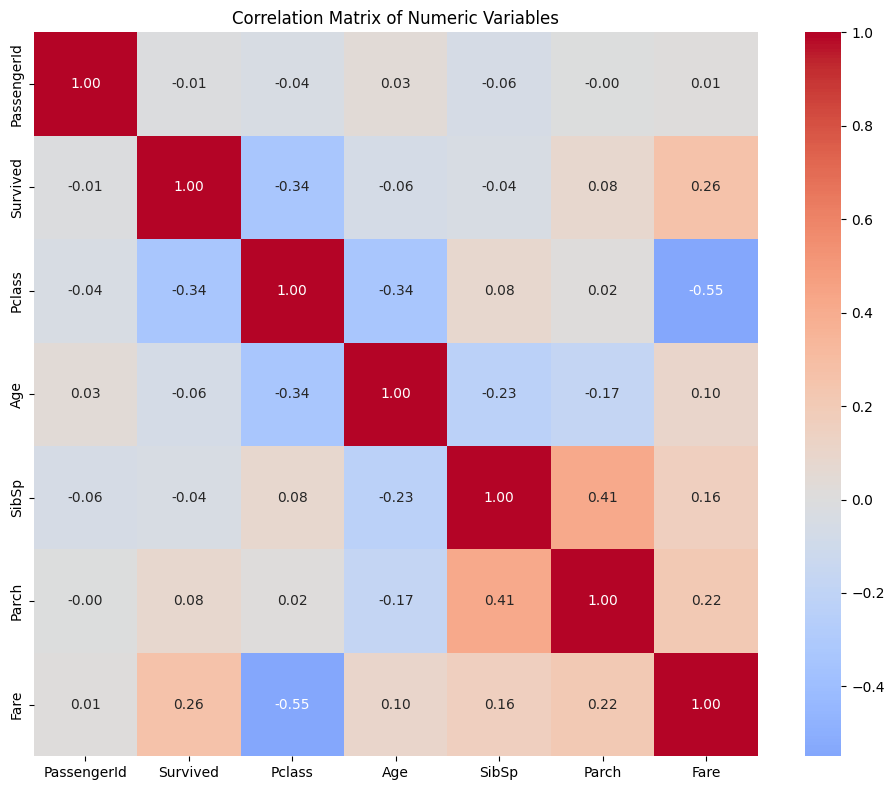


Strong Correlations with Survival:
Pclass: -0.338
Fare: 0.257


In [79]:
# Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Selected only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# strong correlations
print("\nStrong Correlations with Survival:")
survival_corr = correlation_matrix['Survived'].abs().sort_values(ascending=False)
for var, corr in survival_corr.items():
    if var != 'Survived' and corr > 0.1:  # Show correlations above 0.1
        print(f"{var}: {correlation_matrix['Survived'][var]:.3f}")


ADVANCED VISUALIZATIONS


<ipython-input-80-ed87d0fc00b1>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()


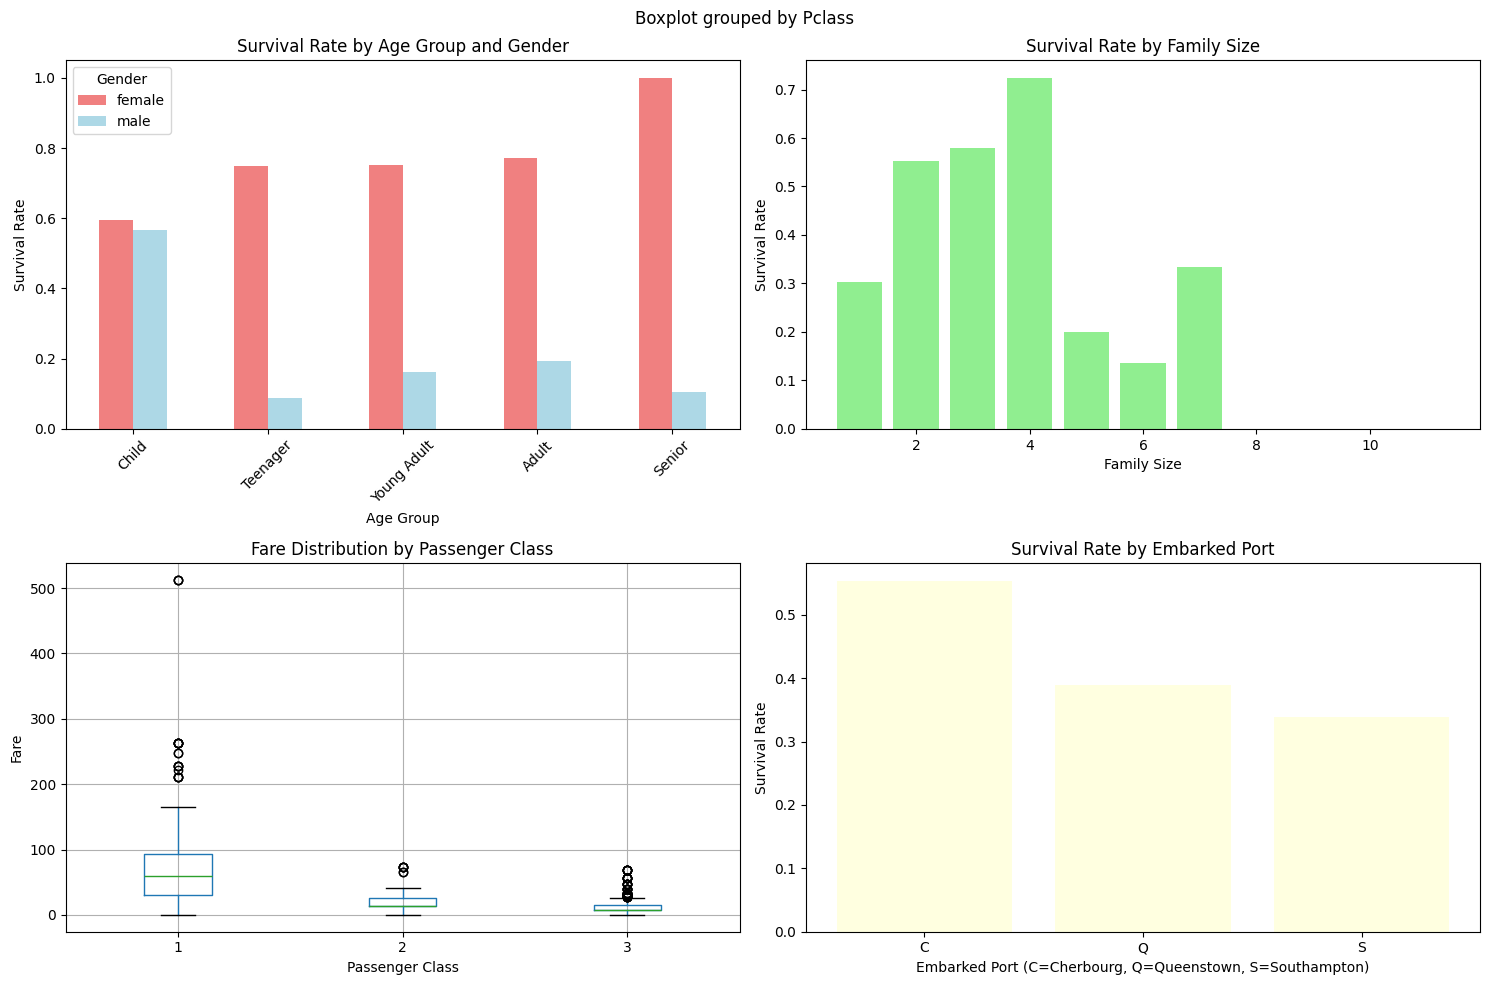

In [80]:
# Advanced Visualizations
print("\n" + "="*50)
print("ADVANCED VISUALIZATIONS")
print("="*50)

# comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Advanced Analysis - Multiple Variable Relationships', fontsize=16)

# 1. Survival by Age groups and Gender
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                       labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()
age_gender_survival.plot(kind='bar', ax=axes[0, 0], color=['lightcoral', 'lightblue'])
axes[0, 0].set_title('Survival Rate by Age Group and Gender')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].legend(title='Gender')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Family Size vs Survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySize')['Survived'].mean()
axes[0, 1].bar(family_survival.index, family_survival.values, color='lightgreen')
axes[0, 1].set_title('Survival Rate by Family Size')
axes[0, 1].set_xlabel('Family Size')
axes[0, 1].set_ylabel('Survival Rate')

# 3. Fare distribution by Class
df.boxplot(column='Fare', by='Pclass', ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution by Passenger Class')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Fare')

# 4. Embarked Port vs Survival
if 'Embarked' in df.columns:
    embarked_survival = df.groupby('Embarked')['Survived'].mean()
    axes[1, 1].bar(embarked_survival.index, embarked_survival.values, color='lightyellow')
    axes[1, 1].set_title('Survival Rate by Embarked Port')
    axes[1, 1].set_xlabel('Embarked Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
    axes[1, 1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()
